In [1]:
import pandas as pd              #for data manipulation
import numpy as np               #for maths
import matplotlib.pyplot as plt  #for visualization
%matplotlib inline

In [2]:
#path to data
dataset = pd.read_csv('abdata.csv')

In [4]:
#lets see the data
dataset.head(10)       

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,146,149,150,150,151,152,152,153,153,...,196,197,197,196,196,195,194,194,190,187
1,1,134,136,139,140,142,144,146,146,146,...,168,162,164,161,164,174,168,157,149,141
2,0,197,195,196,195,197,196,195,196,196,...,84,65,182,213,211,212,212,213,213,213
3,0,142,144,144,146,147,149,150,151,153,...,178,179,179,180,181,182,182,182,183,183
4,0,198,200,201,200,199,198,198,197,198,...,100,99,99,98,99,98,100,100,101,100
5,0,231,232,234,237,238,241,243,244,248,...,90,66,199,255,255,255,255,255,255,255
6,0,147,149,150,152,153,153,152,153,154,...,174,165,166,165,166,169,167,133,135,140
7,1,146,151,156,160,163,165,168,170,172,...,0,20,33,15,21,24,19,27,29,21
8,1,159,161,163,163,161,163,163,162,162,...,48,186,186,181,178,176,175,171,168,167
9,1,82,65,80,60,22,60,68,78,94,...,64,155,191,188,191,193,194,193,193,195


In [5]:
shape = dataset.shape  #get shape
m = shape[0]           #number of images 
num_pix = shape[1]-1      #number of pixels, First Col is Label of Image so '-1'

### Separating Features and Labels from the dataset.

In [7]:
X = dataset.iloc[:,1:].values.astype('float32')
y = dataset.iloc[:,0].values.astype('int32')

#Normalization
X /= 255

print (X.shape)
print (y.shape)

(2136, 784)
(2136,)


In [21]:
X[:5, :]

array([[0.57254905, 0.58431375, 0.5882353 , ..., 0.7607843 , 0.74509805,
        0.73333335],
       [0.5254902 , 0.53333336, 0.54509807, ..., 0.6156863 , 0.58431375,
        0.5529412 ],
       [0.77254903, 0.7647059 , 0.76862746, ..., 0.8352941 , 0.8352941 ,
        0.8352941 ],
       [0.5568628 , 0.5647059 , 0.5647059 , ..., 0.7137255 , 0.7176471 ,
        0.7176471 ],
       [0.7764706 , 0.78431374, 0.7882353 , ..., 0.39215687, 0.39607844,
        0.39215687]], dtype=float32)

### Lets see some images

In [8]:
idx2alph = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o',
            15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z'}

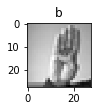

In [16]:
X_reshape = X.reshape(X.shape[0], 28, 28)

a=7
plt.subplot(330 + a)
plt.imshow(X_reshape[a], cmap=plt.get_cmap('gray'))
plt.title(idx2alph[y[a]])
plt.show()

### Normalizing

### One Hot Encoding

In [18]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, 26)
print (y)

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [23]:
X = X.reshape(X.shape[0], 28, 28, 1)
print(X[1])

[[[0.5254902 ]
  [0.53333336]
  [0.54509807]
  [0.54901963]
  [0.5568628 ]
  [0.5647059 ]
  [0.57254905]
  [0.57254905]
  [0.57254905]
  [0.57254905]
  [0.5764706 ]
  [0.57254905]
  [0.5764706 ]
  [0.5803922 ]
  [0.5764706 ]
  [0.5686275 ]
  [0.5686275 ]
  [0.5568628 ]
  [0.57254905]
  [0.5686275 ]
  [0.5529412 ]
  [0.5529412 ]
  [0.54901963]
  [0.54901963]
  [0.5529412 ]
  [0.54901963]
  [0.5411765 ]
  [0.53333336]]

 [[0.5294118 ]
  [0.54509807]
  [0.54901963]
  [0.5568628 ]
  [0.5647059 ]
  [0.57254905]
  [0.57254905]
  [0.5764706 ]
  [0.5764706 ]
  [0.5803922 ]
  [0.5803922 ]
  [0.5764706 ]
  [0.5803922 ]
  [0.5803922 ]
  [0.5803922 ]
  [0.5647059 ]
  [0.5764706 ]
  [0.60784316]
  [0.49019608]
  [0.5411765 ]
  [0.5686275 ]
  [0.56078434]
  [0.5529412 ]
  [0.5529412 ]
  [0.5529412 ]
  [0.5529412 ]
  [0.54901963]
  [0.54509807]]

 [[0.5411765 ]
  [0.54509807]
  [0.5529412 ]
  [0.56078434]
  [0.57254905]
  [0.5764706 ]
  [0.5803922 ]
  [0.58431375]
  [0.58431375]
  [0.58431375]
  [0.5

In [24]:
print(X.shape)
print(y.shape)

(2136, 28, 28, 1)
(2136, 26)


### Hyperparameters

In [25]:
image_size = 28
num_channels = 1

#filter size
patch_size = 3

#depth
depth = 4

#hidden layers
hidden1 = 256

#hyperparameters
learning_rate = 0.1

#regularization
beta = 0

#target_labels
num_classes = 26

### Activation Functions

* **Sigmoid = 1 / (1+exp(-X))** 

* **Softmax = exp(X) / (sum(exp(X),1))**

In [26]:
#sigmoid
def sigmoid(X):
    return 1/(1+np.exp(-1*X))

#softmax
def softmax(X):
    exp_X = np.exp(X)
    sum_exp_X = np.sum(exp_X,1).reshape(-1,1)  #col-wise sum
    exp_X = exp_X/sum_exp_X
    return exp_X

### Initialize Weights
* ** conv_layer1_weights = [3,3,1,4] **<br>
* ** conv_layer2_weights = [3,3,4,16]**<br>
* ** full_layer1_weights = [504,256] **<br>
* ** full_layer2_weights = [256,26]  **<br>

Store these weights in parameters dictionary!

In [27]:
#initialize weights values with 0 mean and 0.5 standard deviation.

def initialize_parameters():
    mean = 0
    std = 0.5
    
    #conv layer weights
    conv_layer1_weights = np.random.normal(mean,std,(patch_size,patch_size,num_channels,depth))
    conv_layer1_biases = np.zeros([1,depth])
    conv_layer2_weights = np.random.normal(mean,std,(patch_size,patch_size,depth,depth*4))
    conv_layer2_biases = np.zeros([1,depth*4])
    
    #fully-connected weights
    full_layer1_weights = np.random.normal(mean,std,(((image_size//4-1) * (image_size//4-1) * depth * 4),hidden1))
    full_layer1_biases = np.zeros([hidden1])
    full_layer2_weights = np.random.normal(mean,std,(hidden1,num_classes))
    full_layer2_biases = np.zeros([num_classes])
    
    parameters = dict()
    parameters['cw1'] = conv_layer1_weights
    parameters['cb1'] = conv_layer1_biases
    parameters['cw2'] = conv_layer2_weights
    parameters['cb2'] = conv_layer2_biases
    parameters['fw1'] = full_layer1_weights
    parameters['fb1'] = full_layer1_biases
    parameters['fw2'] = full_layer2_weights
    parameters['fb2'] = full_layer2_biases
    
    return parameters

In [28]:
para = initialize_parameters()
print(para)

{'cb1': array([[0., 0., 0., 0.]]),
 'cb2': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 'cw1': array([[[[ 0.88594377,  0.45712968, -0.03236992,  0.55741605]],
 
         [[-0.16979406, -0.8501284 ,  0.02380968, -0.07620872]],
 
         [[ 0.10426898, -0.73847573, -0.84047749, -0.11665972]]],
 
 
        [[[-0.80704296, -0.28946819,  0.36896581,  0.31560127]],
 
         [[-0.19852554,  0.07674899, -0.42240421,  1.27759273]],
 
         [[-0.83025236,  0.72967945, -0.56163178, -0.02429057]]],
 
 
        [[[ 1.04991259,  0.81257518,  0.67568199,  0.27196167]],
 
         [[ 0.05706721, -0.38894555, -0.0328161 ,  0.74060154]],
 
         [[-0.9853493 ,  0.14013653,  1.09797887, -0.65746601]]]]),
 'cw2': array([[[[ 3.99224638e-01, -3.11831704e-02, -2.33200737e-01,
           -1.24845551e-01,  1.02602993e-01, -3.02251018e-01,
           -5.73059175e-01, -2.15313302e-01,  3.46214237e-01,
           -5.89409248e-01, -6.33029409e-01, -1.02660764e+00,
          

In [29]:
#stride hardcoded = 2
#padding  = 0

def conv_multiply(image,weights):
    hsize = (image.shape[0]-weights.shape[0])//2 + 1
    vsize = (image.shape[1]-weights.shape[1])//2 + 1
    logits = np.zeros([hsize,vsize,weights.shape[3]])
    for d in range(weights.shape[3]):
        row = 0
        for rpos in range(0,(image.shape[0]-patch_size+1),2):
            col=0
            for cpos in range(0,(image.shape[1]-patch_size+1),2):
                logits[row,col,d] = np.sum(np.multiply(image[rpos:rpos+patch_size, cpos:cpos+patch_size, :],weights[:,:,:,d]))
                col += 1
            row+=1
    return logits

In [32]:
img = X[0]
wts1 = np.zeros((patch_size,patch_size,num_channels,depth))
wts2 = np.ones
logits = conv_multiply(img,wts1)
print(logits)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]


In [33]:
#FORWARD PROPAGATION
def forward_propagation(dataset,parameters):
    #convolution layers activations
    m = dataset.shape[0]
    
    #get the parameters
    cw1 = parameters['cw1']
    cb1 = parameters['cb1']
    cw2 = parameters['cw2']
    cb2 = parameters['cb2']
    
    fw1 = parameters['fw1']
    fb1 = parameters['fb1']
    fw2 = parameters['fw2'](
    fb2 = parameters['fb2']
    
    #to store the intermediate activations for backward propagation
    cache = dict()
    
    conv_activation1 = list()
    conv_activation2 = list()
    
    #image by image convolutional forward propagation
    for i in range(m):
        image = dataset[i]
        logits = conv_multiply(image,cw1) + cb1
        ca1 = sigmoid(logits)
        ca2 = sigmoid(conv_multiply(ca1,cw2) + cb2).reshape((image_size // 4 -1) * (image_size // 4 -1) * depth * 4)
        
        conv_activation1.append(ca1)
        conv_activation2.append(ca2)
        
    #convert into numpy array
    conv_activation1 = np.array(conv_activation1).reshape(m,image_size // 2 -1, image_size // 2 -1, depth)
    conv_activation2 = np.array(conv_activation2).reshape(m,image_size // 4 -1, image_size // 4 -1, depth * 4)
        
    #expand the conv_activation2 into (m,num_features) 
    #num_features = (image_size // 4 * image_size // 4 * depth * 4)
    temp_activation = np.array(conv_activation2).reshape(m,(image_size // 4 -1) * (image_size // 4-1) * depth * 4)
    
    #fully connected layers activations
    full_activation1 = np.matmul(temp_activation,fw1) + fb1
    full_activation1 = sigmoid(full_activation1)
    full_activation2 = np.matmul(full_activation1,fw2) + fb2
    output = softmax(full_activation2)
    
    cache['ca1'] = conv_activation1
    cache['ca2'] = conv_activation2
    cache['fa1'] = full_activation1
    cache['output'] = output
    return cache,output)

In [40]:
cache, output = forward_propagation(X[0:1], para)
print(cache)

{'output': array([[3.81390502e-06, 1.26103515e-04, 4.74191724e-08, 3.40457229e-08,
        3.08163440e-05, 5.45201952e-05, 3.39527193e-07, 7.94962401e-05,
        1.64531437e-08, 1.25346661e-07, 7.29436631e-11, 3.92446886e-07,
        2.26909197e-02, 9.04302306e-05, 2.38566030e-03, 6.39543838e-04,
        9.47460174e-01, 6.86470170e-05, 1.59754422e-04, 4.25169257e-05,
        2.59803678e-02, 4.90273553e-07, 1.36752127e-07, 3.35914325e-05,
        1.22272050e-04, 2.97893325e-05]]), 'fa1': array([[9.99920625e-01, 2.28308647e-05, 7.77492940e-01, 1.68793040e-01,
        3.92979198e-02, 9.83724514e-03, 9.99903915e-01, 5.21528233e-02,
        9.73664298e-01, 9.16161700e-01, 9.81012287e-01, 3.21348097e-01,
        3.83179820e-01, 8.93563000e-02, 9.93278580e-01, 1.42949851e-04,
        1.08379141e-02, 9.94751719e-01, 2.60213162e-01, 9.62496668e-01,
        1.10306872e-03, 6.53185734e-01, 3.51929387e-03, 9.18442272e-01,
        9.71884487e-01, 4.43737218e-01, 3.67591768e-02, 9.86527018e-01,
   

In [41]:
print(output)

[[3.81390502e-06 1.26103515e-04 4.74191724e-08 3.40457229e-08
  3.08163440e-05 5.45201952e-05 3.39527193e-07 7.94962401e-05
  1.64531437e-08 1.25346661e-07 7.29436631e-11 3.92446886e-07
  2.26909197e-02 9.04302306e-05 2.38566030e-03 6.39543838e-04
  9.47460174e-01 6.86470170e-05 1.59754422e-04 4.25169257e-05
  2.59803678e-02 4.90273553e-07 1.36752127e-07 3.35914325e-05
  1.22272050e-04 2.97893325e-05]]


### Backward Propagation
* Apply the Chain Rule and calculate the derivatives.
* Returns the derivatives in ** derivatives dictionary **

#### Calculate Error terms for Conv Layers

In [42]:
#calculate conv deltas or errors only for one example
def conv_delta(next_error,weights):
    delta = np.zeros([next_error.shape[0]*2+1,next_error.shape[1]*2+1,next_error.shape[2]//4])
    for d in range(weights.shape[3]):
        row = 0
        for rpos in range(0,delta.shape[0]-patch_size+1,2):
            col=0
            for cpos in range(0,delta.shape[2]-patch_size+1,2):
                delta[rpos:rpos+patch_size,cpos:cpos+patch_size,:] += weights[:,:,:,d]*next_error[row,col,d]
                col+=1
            row +=1
    return delta

#### Calculate the derivatives for Conv layer Weights

In [43]:
#conv partial derivatives only for single example
def conv_derivatives(delta,activation):
    partial_derivatives = np.zeros([patch_size,patch_size,activation.shape[2],delta.shape[2]])
    for d2 in range(0,partial_derivatives.shape[3]):
        row=0
        for rpos in range(0,activation.shape[0]-patch_size+1,2):
            col = 0
            for cpos in range(0,activation.shape[1]-patch_size+1,2):
                partial_derivatives[:,:,:,d2] += np.multiply(activation[rpos:rpos+patch_size, cpos:cpos+patch_size, :],delta[row,col,d2])
                col += 1
            row += 1
    return partial_derivatives

#### Full Backward Propagation

In [44]:
def backward_propagation(dataset,labels,cache,parameters):
    #get activations
    output = cache['output']
    fa1 = cache['fa1']
    ca2 = cache['ca2']
    ca1 = cache['ca1']
    
    temp_act = np.array(ca2).reshape(-1,(image_size // 4-1) * (image_size // 4 -1)* depth * 4)
    
    #get parameters
    cw1 = parameters['cw1']
    cw2 = parameters['cw2']
    fw1 = parameters['fw1']
    fw2 = parameters['fw2']
    
    
    #cal errors fully connected
    error_fa2 = output - labels
    error_fa1 = np.matmul(error_fa2,fw2.T)
    error_fa1 = np.multiply(error_fa1,fa1)
    error_fa1 = np.multiply(error_fa1,(1-fa1))
    error_temp = np.matmul(error_fa1,fw1.T)
    error_temp = np.multiply(error_temp,temp_act)
    error_temp = np.multiply(error_temp,(1-temp_act))
    
    m = dataset.shape[0]
    
    #cal errors conv layers
    error_ca2 = np.array(error_temp).reshape(-1,image_size//4-1,image_size//4-1,depth*4)
    error_ca1 = np.zeros(ca1.shape)
    ## Image by Image error
    for i in range(m):
        error = conv_delta(error_ca2[i],cw2)
        error = np.multiply(error,ca1[i])
        error = np.multiply(error,(1-ca1[i]))
        error_ca1 += error
    
    
    #calculate partial derivatives
    #fully connected layers
    fd2 = (np.matmul(fa1.T,error_fa2) + beta*fw2)/m
    fd1 = (np.matmul(temp_act.T,error_fa1) + beta*fw1)/m
    
    #conv layers
    cd2 = np.zeros(cw2.shape)
    cd1 = np.zeros(cw1.shape)
    
    ##Image by Image derivatives
    for i in range(m):
        cd2 = cd2 + conv_derivatives(error_ca2[i],ca1[i])
        cd1 = cd1 + conv_derivatives(error_ca1[i],dataset[i])
    cd2 = (cd2 + beta*cw2)/m
    cd1 = (cd1 + beta*cw1)/m
    
    
    #store the derivatives in dict
    derivatives = dict()
    
    derivatives['cd1'] = cd1
    derivatives['cd2'] = cd2
    derivatives['fd1'] = fd1
    derivatives['fd2'] = fd2
    
    return derivatives

In [45]:
deriv = backward_propagation(X[0:1], y[0:1], cache, para)
print(deriv)

{'fd2': array([[ 3.81360229e-06, -9.99794532e-01,  4.74154086e-08, ...,
         3.35887662e-05,  1.22262345e-04,  2.97869680e-05],
       [ 8.70747493e-11, -2.28279856e-05,  1.08262071e-12, ...,
         7.66921450e-10,  2.79157662e-09,  6.80116219e-10],
       [ 2.96528422e-06, -7.77394896e-01,  3.68680718e-08, ...,
         2.61171016e-05,  9.50656556e-05,  2.31609957e-05],
       ...,
       [ 6.82626901e-12, -1.78961148e-06,  8.48725980e-14, ...,
         6.01231949e-11,  2.18847061e-10,  5.33180549e-11],
       [ 3.79978704e-06, -9.96172651e-01,  4.72436403e-08, ...,
         3.34670867e-05,  1.21819434e-04,  2.96790610e-05],
       [ 3.13670850e-08, -8.22336408e-03,  3.89994299e-10, ...,
         2.76269418e-07,  1.00561440e-06,  2.44999422e-07]]), 'cd1': array([[[[ 0.40494338,  0.09055639, -0.34304475,  0.03388009]],

        [[ 0.40925727,  0.09114113, -0.34383413,  0.03517093]],

        [[ 0.41212705,  0.09346698, -0.34766309,  0.03317504]]],


       [[[ 0.40762496,  0.0902

### Update Parameters

In [46]:
def update_parameters(derivatives,parameters):
    #get parameters
    cw1 = parameters['cw1']
    cw2 = parameters['cw2']
    fw1 = parameters['fw1']
    fw2 = parameters['fw2']
    
    #get derivatives
    cd1 = derivatives['cd1']
    cd2 = derivatives['cd2']
    fd1 = derivatives['fd1']
    fd2 = derivatives['fd2']
    
    #update
    cw1 = cw1 - learning_rate*cd1
    cw2 = cw2 - learning_rate*cd2
    fw1 = fw1 - learning_rate*fd1
    fw2 = fw2 - learning_rate*fd2
    
    #update the dict
    parameters['cw1'] = cw1
    parameters['cw2'] = cw2
    parameters['fw1'] = fw1
    parameters['fw2'] = fw2
    
    return parameters

In [48]:
para2 = update_parameters(deriv, para)
print(para2)

{'cb2': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 'cb1': array([[0., 0., 0., 0.]]), 'fb2': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'cw2': array([[[[ 3.37432065e-01, -1.24906123e-02, -2.02185317e-01,
          -1.49997953e-01,  6.70629730e-02, -2.76511987e-01,
          -5.87768497e-01, -2.34776811e-01,  3.39861387e-01,
          -6.56478451e-01, -6.44620299e-01, -1.00382693e+00,
          -2.97558705e-01,  1.11967466e-01, -1.87340827e-01,
          -6.92560900e-01],
         [ 5.84192957e-01, -3.45197036e-01,  1.99094815e-01,
          -8.55000436e-01, -6.53077173e-01, -1.52795722e-01,
           6.13120729e-02, -3.64518385e-02,  4.88555422e-01,
          -2.00940485e-01,  7.89743686e-01, -2.72867857e-01,
           1.57167426e+00,  2.02997092e-01,  7.42631766e-01,
          -6.10271084e-01],
         [-4.50061556e-01,  3.97601004e-01,  1.43737624e+00,
          -2.99336954e

### Loss and Accuracy
* Loss = -sum((Y x log(predictions) + (1-Y) x (log(1-predictions))))/m + (beta x (sum(cw1^2) + sum(cw2^2) + sum(fw1^2) + sum(fw2^2)))
* Accuray = sum(Y==Predictions)/m <br>

m = number of examples

In [49]:
def cal_loss_accuracy(true_labels,predictions,parameters):
    #get parameters
    cw1 = parameters['cw1']
    cw2 = parameters['cw2']
    fw1 = parameters['fw1']
    fw2 = parameters['fw2']
    
    m = len(true_labels)
    
    #cal loss
    loss = -1*(np.sum(np.multiply(np.log(predictions),true_labels),1) + np.sum(np.multiply(np.log(1-predictions),1-true_labels),1))
    loss = np.sum(loss)
    loss = loss + beta*(np.sum(cw1**2) + np.sum(cw2**2) + np.sum(fw1**2) + np.sum(fw2**2))
    loss = loss/m
    
    #cal accuracy
    accuracy = np.sum(np.argmax(true_labels,1)==np.argmax(predictions,1))/m
    
    return loss,accuracy

In [50]:
#train function
def train(train_dataset,train_labels,batch_size=20,iters=101,stride=2):
    
    #initialize the parameters
    parameters = initialize_parameters()
    
    cw1 = parameters['cw1']
    cb1 = parameters['cb1']
    cw2 = parameters['cw2']
    cb2 = parameters['cb2']
    
    fw1 = parameters['fw1']
    fb1 = parameters['fb1']
    fw2 = parameters['fw2']
    fb2 = parameters['fb2']
    
    J = []  #store the loss o every batch
    A = []  #store the accuracy of every batch
    
    
    #training process.
    for step in range(iters):
        #get the batch data.
        start = (step*batch_size)%(train_dataset.shape[0])
        end = start + batch_size
        
        batch_dataset = train_dataset[start:end,:,:,:]
        batch_labels = train_labels[start:end,:]
        
        #forward propagation
        cache,output = forward_propagation(batch_dataset,parameters)
        
        #cal_loss and accuracy
        loss,accuracy = cal_loss_accuracy(batch_labels,output,parameters)
        
        #calculate the derivatives
        derivatives = backward_propagation(batch_dataset,batch_labels,cache,parameters)
        
        #update the parameters
        parameters = update_parameters(derivatives,parameters)
        
        #append the loss and accuracy of every batch
        J.append(loss)
        A.append(accuracy)
        
        #print loss and accuracy of the batch dataset.
        if(step%100==0):
            print('Step : %d'%step)
            print('Loss : %f'%loss)
            print('Accuracy : %f%%'%(round(accuracy*100,2)))
            
    return J,A,parameters

###  Training

In [53]:
#TRAINING
J,A,parameters = train(X, y, iters=1501)

Step : 0
Loss : 20.543191
Accuracy : 0.000000%
Step : 100
Loss : 9.202601
Accuracy : 40.000000%
Step : 200
Loss : 6.676801
Accuracy : 65.000000%
Step : 300
Loss : 2.344057
Accuracy : 50.000000%
Step : 400
Loss : 0.729807
Accuracy : 95.000000%
Step : 500
Loss : 0.963009
Accuracy : 70.000000%
Step : 600
Loss : 4.378844
Accuracy : 45.000000%
Step : 700
Loss : 0.295189
Accuracy : 100.000000%
Step : 800
Loss : 0.520291
Accuracy : 90.000000%
Step : 900
Loss : 0.252043
Accuracy : 95.000000%
Step : 1000
Loss : 0.096526
Accuracy : 100.000000%
Step : 1100
Loss : 0.203261
Accuracy : 100.000000%
Step : 1200
Loss : 0.054341
Accuracy : 100.000000%
Step : 1300
Loss : 0.049730
Accuracy : 100.000000%
Step : 1400
Loss : 0.058710
Accuracy : 100.000000%
Step : 1500
Loss : 0.065006
Accuracy : 100.000000%


Important note:
** The above accuracy and loss are of random batch data of size = 20, and not of entire training set **

### Plot Graphs

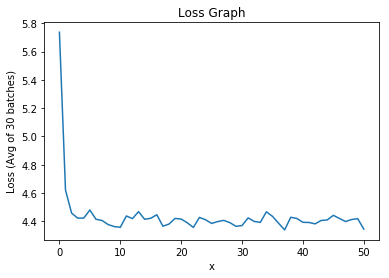

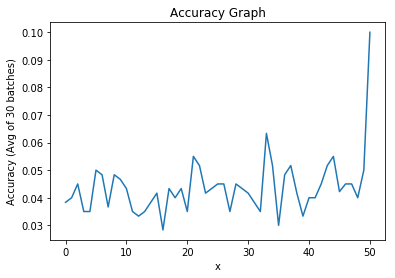

In [29]:
avg_loss = list()
avg_acc = list()
i = 0
while(i<len(J)):
    avg_loss.append(np.mean(J[i:i+30]))
    avg_acc.append(np.mean(A[i:i+30]))
    i += 30

plt.plot(list(range(len(avg_loss))),avg_loss)
plt.xlabel("x")
plt.ylabel("Loss (Avg of 30 batches)")
plt.title("Loss Graph")
plt.show()

plt.plot(list(range(len(avg_acc))),avg_acc)
plt.xlabel("x")
plt.ylabel("Accuracy (Avg of 30 batches)")
plt.title("Accuracy Graph")
plt.show()    